<p style="background-color:#6699ff;color:black;font-size:25px;text-align:center;border-radius:10px 11px;font-weight:bold;border-style:solid;border-color:blue;">Customer Segmentation using R 🛒👨‍💼 </p>
<center><img src="https://github.com/Isharaneranjana/kaggle_gif/blob/main/kmean.gif?raw=true"></center>

## <p style="background-color:#78BAF0;color:black;font-size:23px;text-align:center;border-radius:10px 10px;border-style:solid;border-color:blue;">✨ Introduction </p>
<p style="border: 3px solid blue;"><font size="4">Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.</font> </p>

<font size="4">customers have different personalities and are spread across the various stages of sales funnel. Customers show different personalities and behavior when they are potential customers or even when you need to support them in the customer service and customer success stages. In such cases, having the same approach to handle all your customers leads to bad customer experiences. And studies show that 33% of customers leave a brand they leave just after one bad experience!!</font>

<font size="4">Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.</font>



## <p style="background-color:#78BAF0;color:black;font-size:23px;text-align:center;border-radius:10px 10px;border-style:solid;border-color:blue;">🔏Description of the dataset </p>

<font size="4">This dataset contains 29 variables and 2240 observations about different customers.</font>

<font size="4">Here's a brief version of the data description file.</font>

### People

* ID: Customer's unique identifier
* Year_Birth: Customer's birth year
* Education: Customer's education level
* Marital_Status: Customer's marital status
* Income: Customer's yearly household income
* Kidhome: Number of children in customer's household
* Teenhome: Number of teenagers in customer's household
* Dt_Customer: Date of customer's enrollment with the company
* Recency: Number of days since customer's last purchase
* Complain: 1 if customer complained in the last 2 years, 0 otherwise

### Products

* MntWines: Amount spent on wine in last 2 years
* MntFruits: Amount spent on fruits in last 2 years
* MntMeatProducts: Amount spent on meat in last 2 years
* MntFishProducts: Amount spent on fish in last 2 years
* MntSweetProducts: Amount spent on sweets in last 2 years
* MntGoldProds: Amount spent on gold in last 2 years

### Promotion

* NumDealsPurchases: Number of purchases made with a discount
* AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

### Place

* NumWebPurchases: Number of purchases made through the company’s web site
* NumCatalogPurchases: Number of purchases made using a catalogue
* NumStorePurchases: Number of purchases made directly in stores
* NumWebVisitsMonth: Number of visits to company’s web site in the last month

### 🛒 importing dataset...

In [1]:
library(tidyverse)
#data=read_csv("../input/customer-personality-analysis/marketing_campaign.csv")
data=read.table("../input/customer-personality-analysis/marketing_campaign.csv", sep = "\t", header = T)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
options(warn=-1)
df=data.frame(data)

In [3]:
head(df)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,⋯,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,5524,1957,Graduation,Single,58138,0,0,04-09-2012,58,635,⋯,7,0,0,0,0,0,0,3,11,1
2,2174,1954,Graduation,Single,46344,1,1,08-03-2014,38,11,⋯,5,0,0,0,0,0,0,3,11,0
3,4141,1965,Graduation,Together,71613,0,0,21-08-2013,26,426,⋯,4,0,0,0,0,0,0,3,11,0
4,6182,1984,Graduation,Together,26646,1,0,10-02-2014,26,11,⋯,6,0,0,0,0,0,0,3,11,0
5,5324,1981,PhD,Married,58293,1,0,19-01-2014,94,173,⋯,5,0,0,0,0,0,0,3,11,0
6,7446,1967,Master,Together,62513,0,1,09-09-2013,16,520,⋯,6,0,0,0,0,0,0,3,11,0


<font size="4">Checking for missing values.</font>

In [4]:
missing.values <- df %>%
  gather(key = "key", value = "val") %>%
  mutate(isna = is.na(val)) %>%
  group_by(key) %>%
  mutate(total = n()) %>%
  group_by(key, total, isna) %>%
  summarise(num.isna = n()) %>%
  mutate(pct = num.isna / total * 100)

`summarise()` has grouped output by 'key', 'total'. You can override using the `.groups` argument.



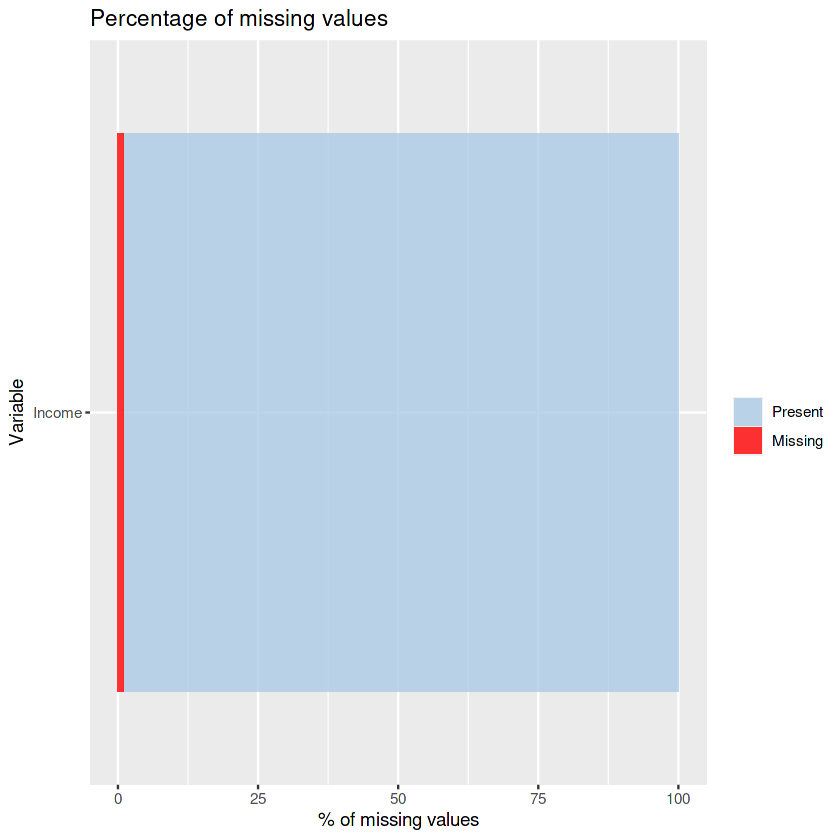

In [5]:
levels =(missing.values  %>% filter(isna == T) %>% arrange(desc(pct)))$key

percentage.plot = missing.values %>%
      ggplot() +
        geom_bar(aes(x = reorder(key, desc(pct)), 
                     y = pct, fill=isna), 
                 stat = 'identity', alpha=0.8) +
      scale_x_discrete(limits = levels) +
      scale_fill_manual(name = "", 
                        values = c('#adcae6', 'red'), labels = c("Present", "Missing")) +
      coord_flip() +
      labs(title = "Percentage of missing values", x ='Variable', y = "% of missing values")
percentage.plot

<font size="4">The Income variable has some missing values. since the percentage is very low. I will remove them.</font>

In [6]:
df1=na.omit(df)

<font size="4">we can calculate customer age from the birth year. It will be more usefull to our analysis.</font>

In [7]:
df1['Age']= 2021-df1$Year_Birth

<font size="4">These variables can be combined and we can get the no of children for the customers.</font>

In [8]:
df1['Child']=df1$Kidhome+df1$Teenhome

In [9]:
print(min(df1$Dt_Customer))
print(max(df1$Dt_Customer))

[1] "01-01-2013"
[1] "31-12-2013"


<font size="4">The spent amounts for various items can be combined.</font>

In [10]:
df1['total_spent']=df1$MntMeatProducts+df1$MntFishProducts+df1$MntWines+df1$MntFruits+df1$MntSweetProducts+df1$MntGoldProds

<font size="4">Details about previous campains also combined.</font>

In [11]:
df1['accepted']=df1$AcceptedCmp1+df1$AcceptedCmp2+df1$AcceptedCmp3+df1$AcceptedCmp4+df1$AcceptedCmp5

In [12]:
head(df1)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,⋯,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Child,total_spent,accepted
,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>
1,5524,1957,Graduation,Single,58138,0,0,04-09-2012,58,635,⋯,0,0,0,3,11,1,64,0,1617,0
2,2174,1954,Graduation,Single,46344,1,1,08-03-2014,38,11,⋯,0,0,0,3,11,0,67,2,27,0
3,4141,1965,Graduation,Together,71613,0,0,21-08-2013,26,426,⋯,0,0,0,3,11,0,56,0,776,0
4,6182,1984,Graduation,Together,26646,1,0,10-02-2014,26,11,⋯,0,0,0,3,11,0,37,1,53,0
5,5324,1981,PhD,Married,58293,1,0,19-01-2014,94,173,⋯,0,0,0,3,11,0,40,1,422,0
6,7446,1967,Master,Together,62513,0,1,09-09-2013,16,520,⋯,0,0,0,3,11,0,54,1,716,0


In [13]:
names(df1)

[1] "ID"                  "Year_Birth"          "Education"          
 [4] "Marital_Status"      "Income"              "Kidhome"            
 [7] "Teenhome"            "Dt_Customer"         "Recency"            
[10] "MntWines"            "MntFruits"           "MntMeatProducts"    
[13] "MntFishProducts"     "MntSweetProducts"    "MntGoldProds"       
[16] "NumDealsPurchases"   "NumWebPurchases"     "NumCatalogPurchases"
[19] "NumStorePurchases"   "NumWebVisitsMonth"   "AcceptedCmp3"       
[22] "AcceptedCmp4"        "AcceptedCmp5"        "AcceptedCmp1"       
[25] "AcceptedCmp2"        "Complain"            "Z_CostContact"      
[28] "Z_Revenue"           "Response"            "Age"                
[31] "Child"               "total_spent"         "accepted"

<font size="4">Removed the original vaiables since now this dataset contains new combined features.</font>

In [14]:
df1=df1[c(-1,-2,-6,-7,-8,-10,-11,-12,-13,-14,-15,-21,-22,-23,-24,-25,-27,-28)]

In [15]:
head(df1)

,Education,Marital_Status,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Child,total_spent,accepted
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>
1,Graduation,Single,58138,58,3,8,10,4,7,0,1,64,0,1617,0
2,Graduation,Single,46344,38,2,1,1,2,5,0,0,67,2,27,0
3,Graduation,Together,71613,26,1,8,2,10,4,0,0,56,0,776,0
4,Graduation,Together,26646,26,2,2,0,4,6,0,0,37,1,53,0
5,PhD,Married,58293,94,5,5,3,6,5,0,0,40,1,422,0
6,Master,Together,62513,16,2,6,4,10,6,0,0,54,1,716,0


## <p style="background-color:#78BAF0;color:black;font-size:23px;text-align:center;border-radius:10px 10px;border-style:solid;border-color:blue;">📊 Main finding in Descriptive analysis </p>

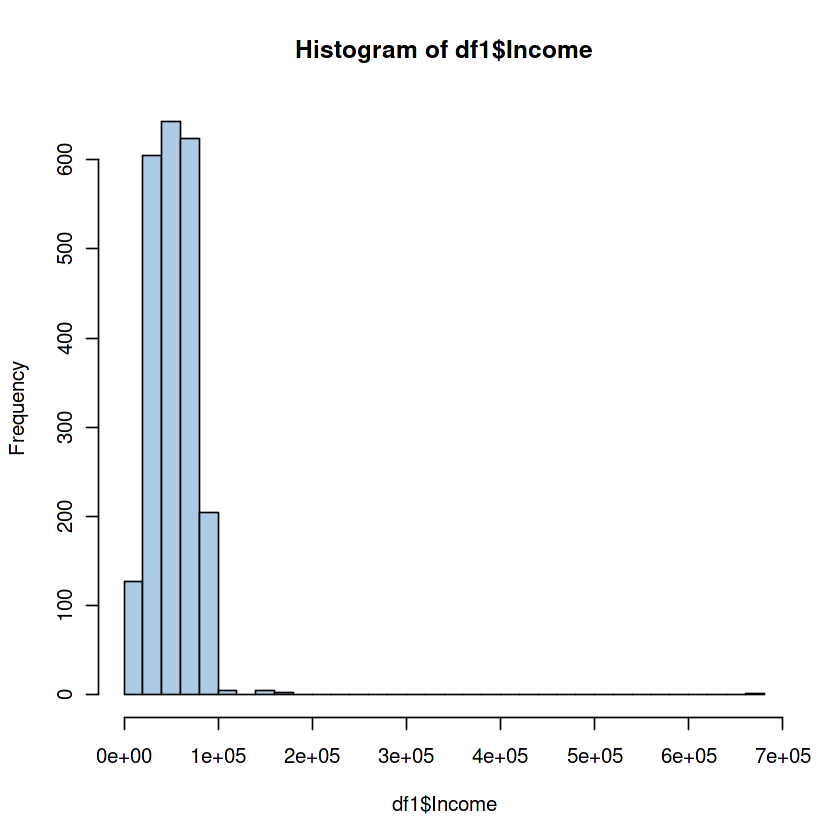

In [16]:
hist(df1$Income,40,col="#adcae6")

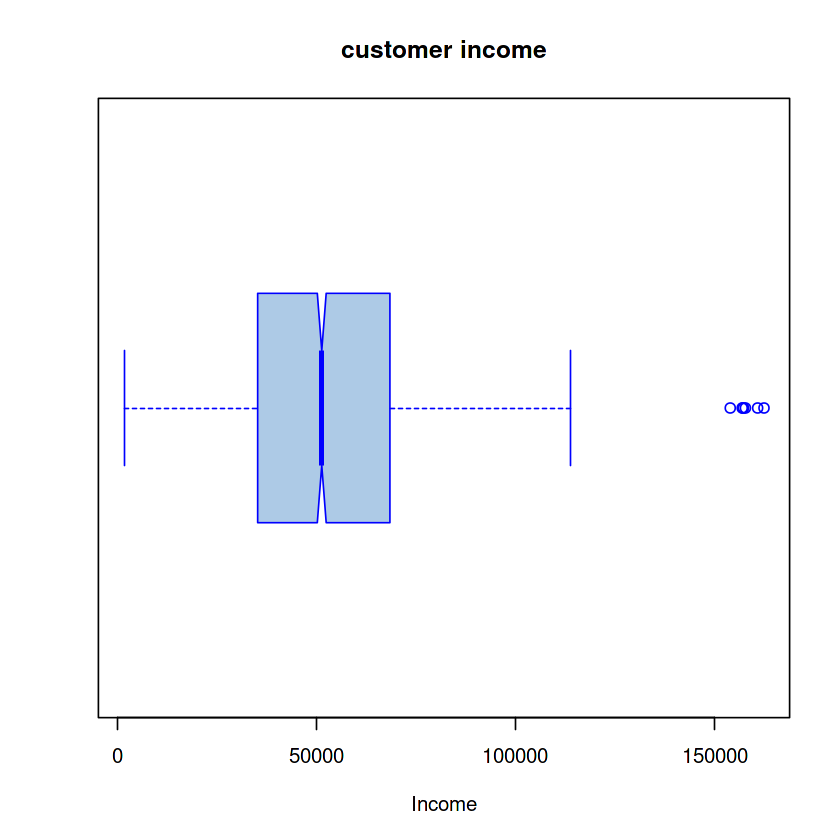

In [17]:
income=df1$Income[df1$Income<180000]
boxplot(income,
main = "customer income",
xlab = "Income",
ylab = "",
col = "#adcae6",
border = "blue",
horizontal = TRUE,
notch = TRUE
)


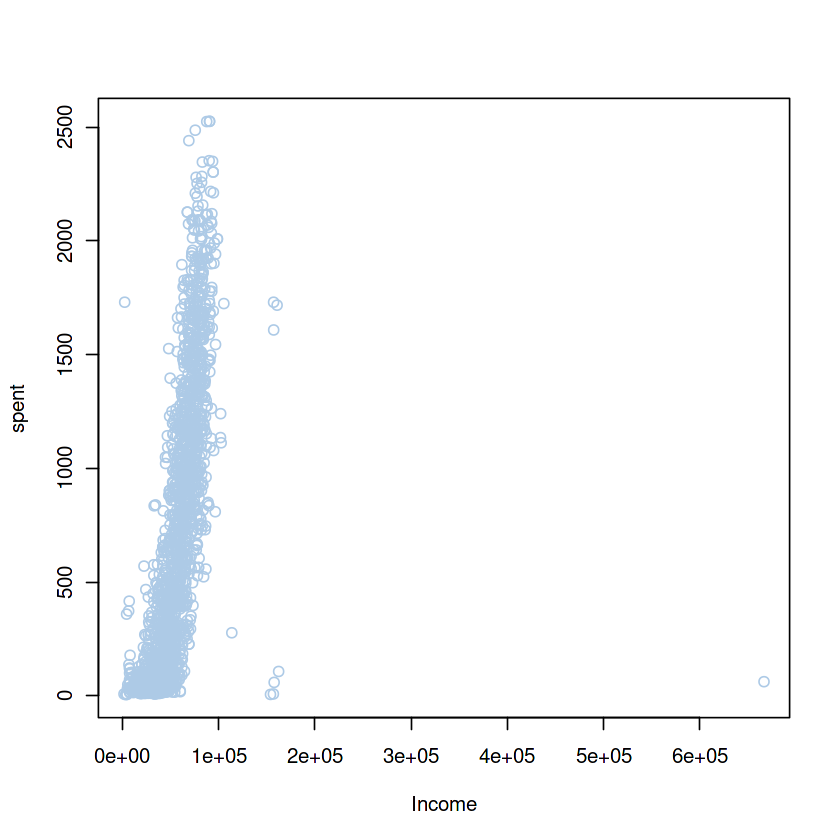

In [18]:
plot(df1$Income,df1$total_spent,col='#adcae6',xlab='Income',ylab='spent')

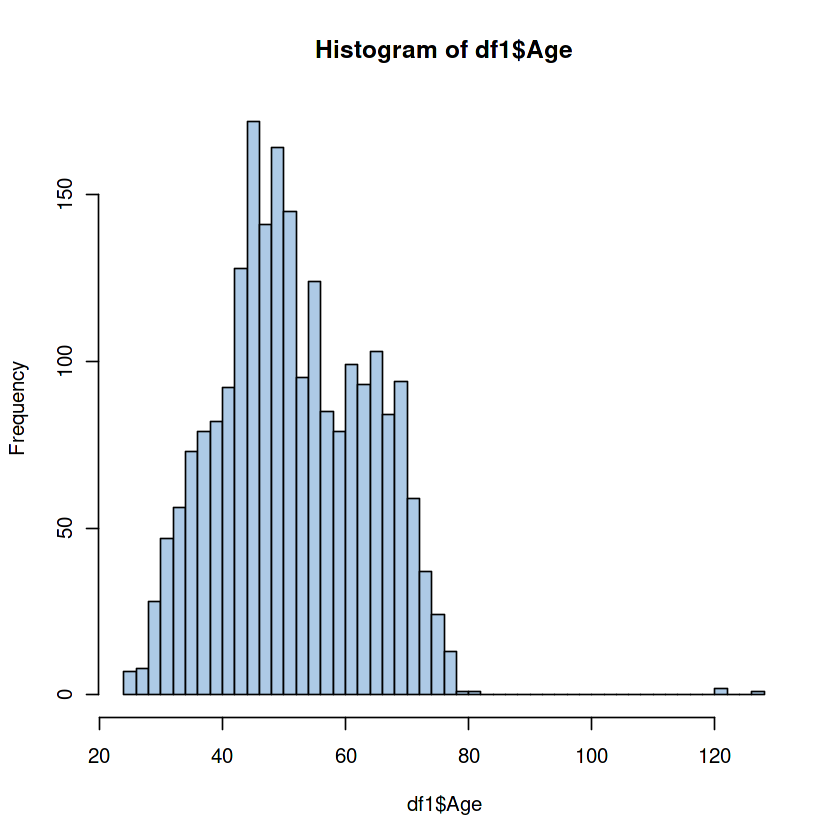

In [19]:
hist(df1$Age,50,col="#adcae6")

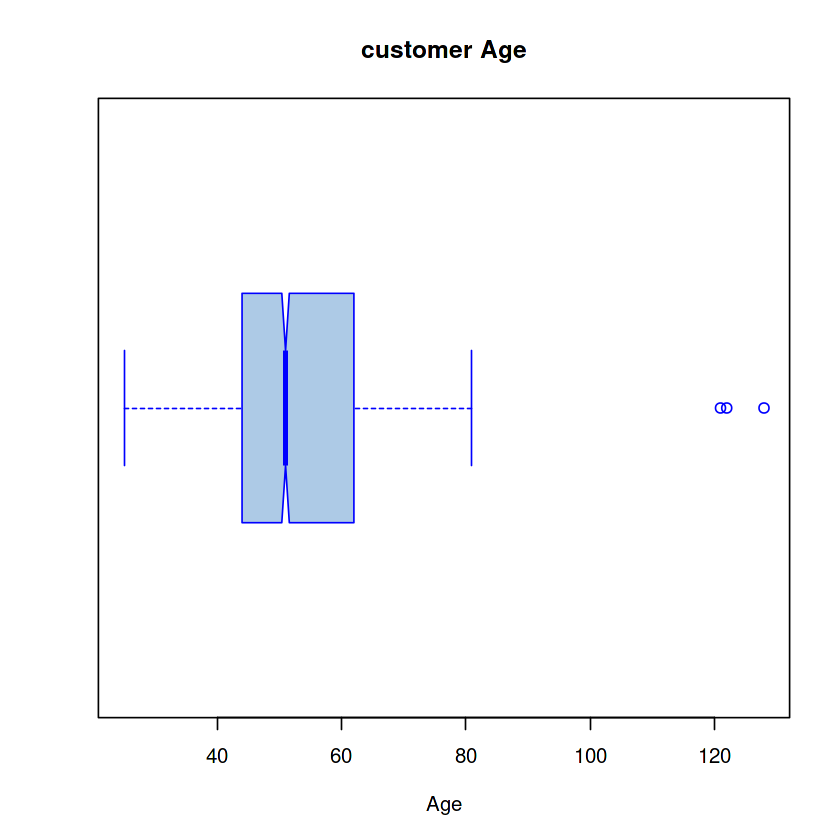

In [20]:
boxplot(df1$Age,
main = "customer Age",
xlab = "Age",
ylab = "",
col = "#adcae6",
border = "blue",
horizontal = TRUE,
notch = TRUE
)

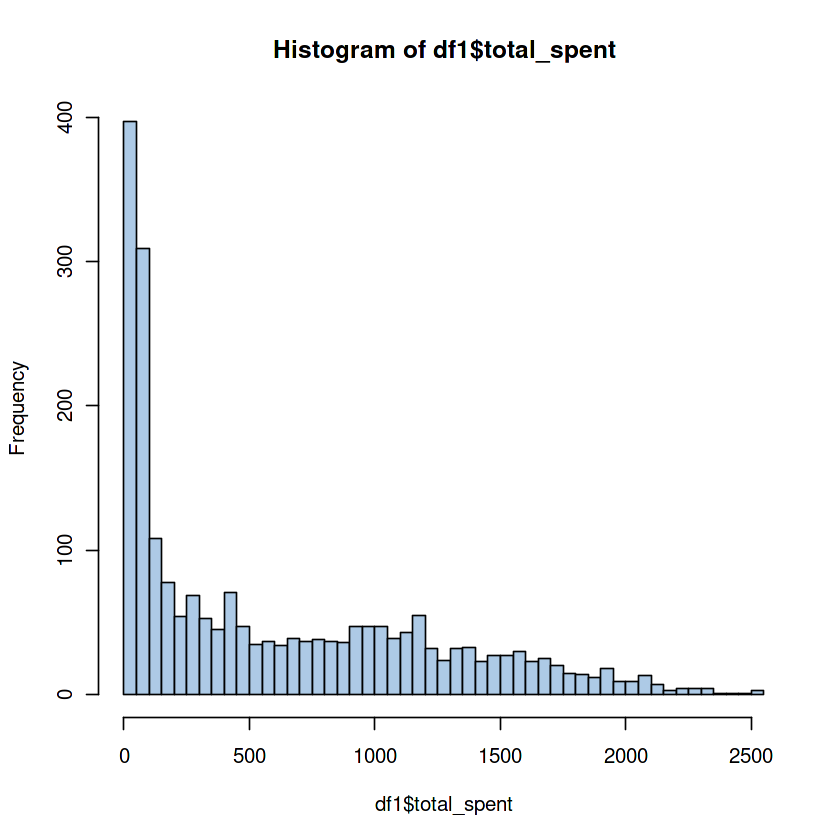

In [21]:
hist(df1$total_spent,50,col="#adcae6")

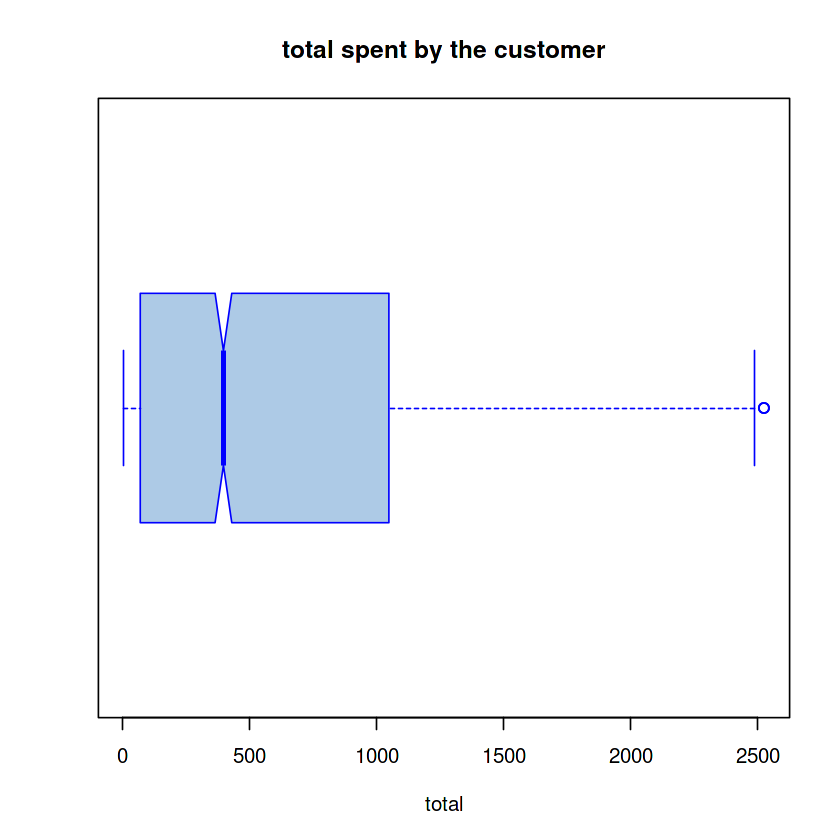

In [22]:
boxplot(df1$total_spent,
main = "total spent by the customer",
xlab = "total",
ylab = "",
col = "#adcae6",
border = "blue",
horizontal = TRUE,
notch = TRUE
)

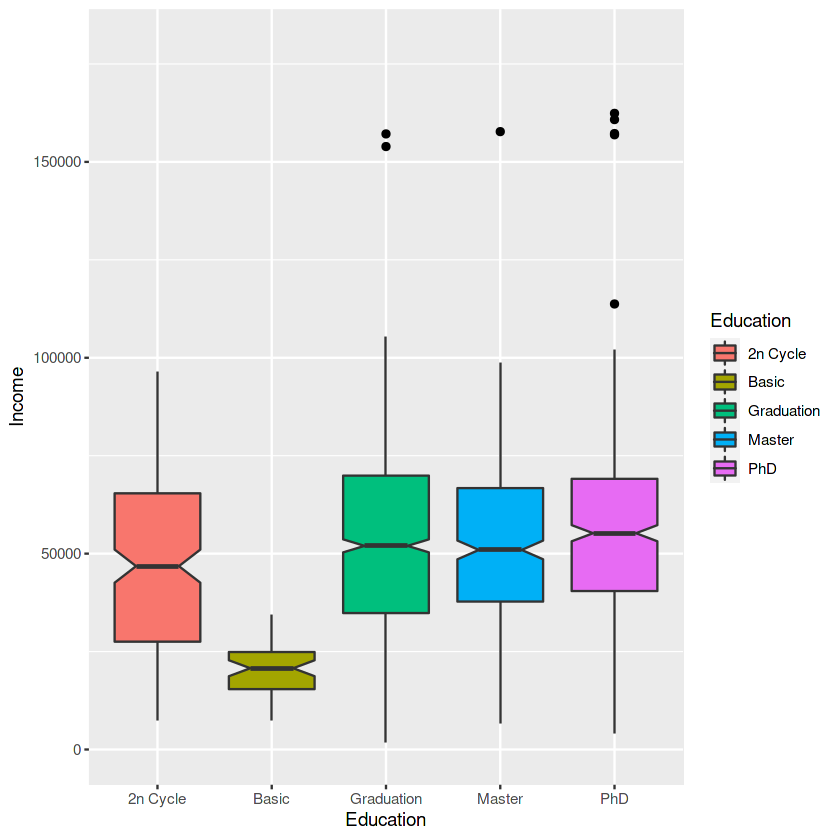

In [23]:
eduplot = ggplot(df1, aes(x=Education,y=Income,fill=Education))+ylim(0,180000)+geom_boxplot(outlier.colour="black", outlier.shape=16,outlier.size=2, notch=T)
eduplot

<font size="4">we can see that basic education level customers have less income compared to others.</font>

notch went outside hinges. Try setting notch=FALSE.

notch went outside hinges. Try setting notch=FALSE.



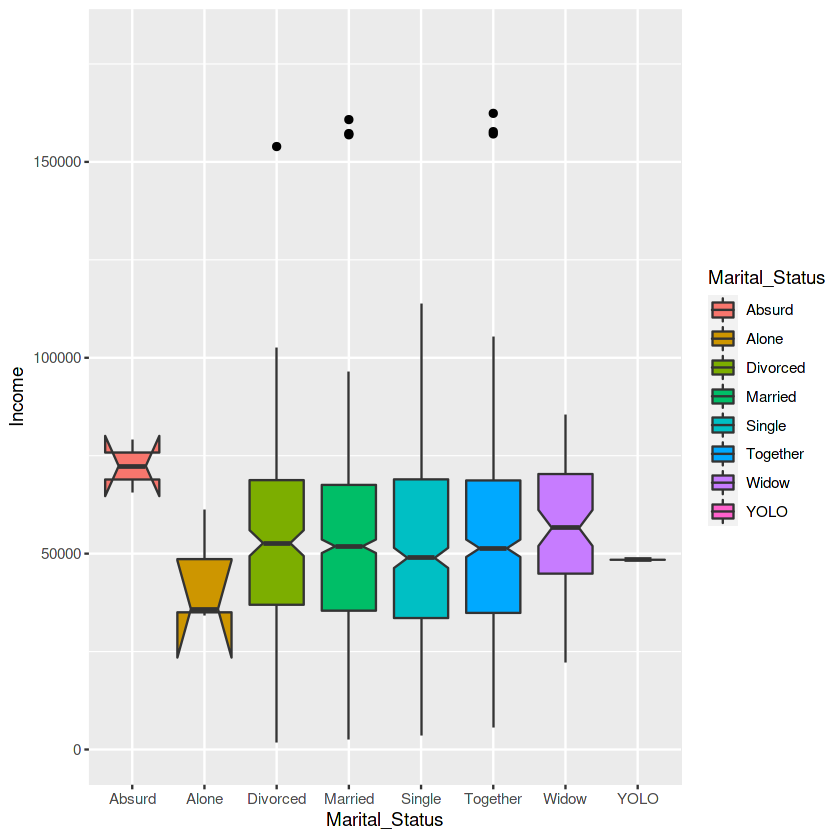

In [24]:
mplot = ggplot(df1, aes(x=Marital_Status,y=Income,fill=Marital_Status))+ylim(0,180000)+geom_boxplot(outlier.colour="black", outlier.shape=16,outlier.size=2, notch=T)
mplot


<font size="4">Creating dummy variables for categorical variables.</font>

In [25]:
library(caret)

dmy <- dummyVars(" ~ .", data = df1, fullRank = T)
dat_transformed <- data.frame(predict(dmy, newdata = df1))

glimpse(dat_transformed)

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


The following object is masked from ‘package:httr’:

    progress




Rows: 2,216
Columns: 24
$ EducationBasic         <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,…
$ EducationGraduation    <dbl> 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,…
$ EducationMaster        <dbl> 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,…
$ EducationPhD           <dbl> 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,…
$ Marital_StatusAlone    <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ Marital_StatusDivorced <dbl> 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,…
$ Marital_StatusMarried  <dbl> 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,…
$ Marital_StatusSingle   <dbl> 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,…
$ Marital_StatusTogether <dbl> 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,…
$ Marital_StatusWidow    <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ Marital_StatusYOLO     <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ Income                 <dbl> 58138, 46344, 71613, 26646, 58293, 62513, 55635…
$ Recency       

In [26]:
dfc=dat_transformed[c(7,8,13,14,15,16,17,18,19,20,21,22,23,24)]

In [27]:
head(dfc)

,Marital_StatusMarried,Marital_StatusSingle,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Child,total_spent,accepted
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,1,58,3,8,10,4,7,0,1,64,0,1617,0
2,0,1,38,2,1,1,2,5,0,0,67,2,27,0
3,0,0,26,1,8,2,10,4,0,0,56,0,776,0
4,0,0,26,2,2,0,4,6,0,0,37,1,53,0
5,1,0,94,5,5,3,6,5,0,0,40,1,422,0
6,0,0,16,2,6,4,10,6,0,0,54,1,716,0


<font size="4">Here I removed the Income variable. First I did clustering using that variable but it does not help to get clear seperation. And also in this problem I am interesting about the amount customer spent rather than his/her Income.</font>

## <p style="background-color:#78BAF0;color:black;font-size:23px;text-align:center;border-radius:10px 10px;border-style:solid;border-color:blue;"> 🎨 K Means Clustering </p>

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



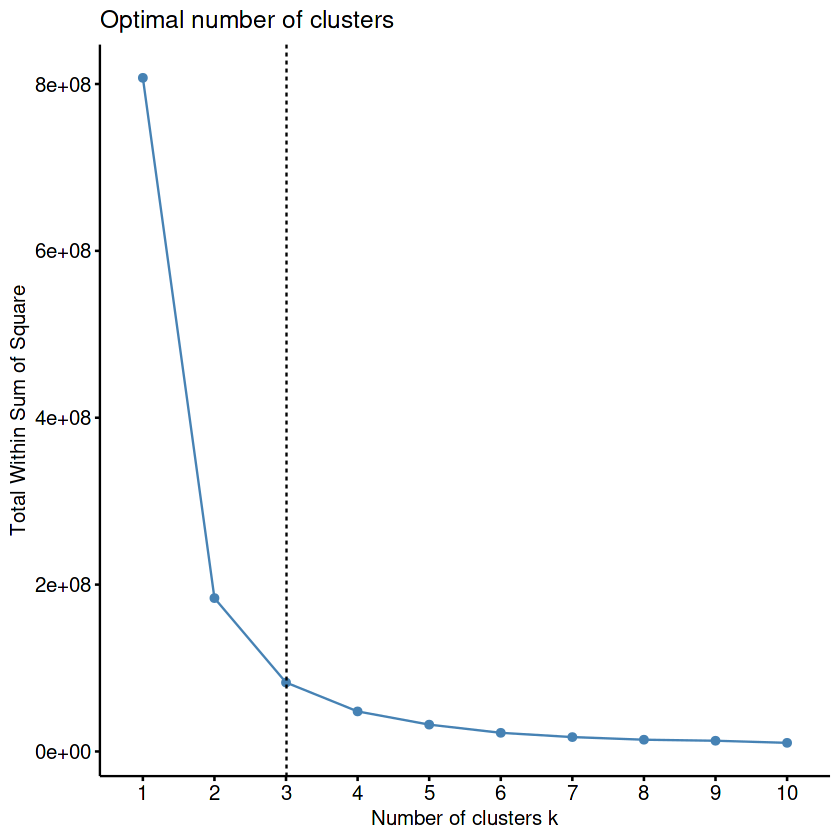

In [28]:
library(factoextra)

fviz_nbclust(dfc,kmeans,method="wss")+geom_vline(xintercept=3,linetype=2)

In [29]:
set.seed(123)
km.res <- kmeans(dfc, 3, nstart = 10)

In [30]:
print(km.res$centers)

  Marital_StatusMarried Marital_StatusSingle  Recency NumDealsPurchases
1             0.3933121            0.2165605 48.62898          2.340764
2             0.3793677            0.1863561 48.80865          2.728785
3             0.3760446            0.2423398 50.69638          1.584958
  NumWebPurchases NumCatalogPurchases NumStorePurchases NumWebVisitsMonth
1        2.719745           0.8073248          3.730892          6.314490
2        6.093178           4.3777038          8.660566          4.379368
3        5.501393           6.3342618          8.256267          3.409471
     Complain  Response      Age     Child total_spent  accepted
1 0.011146497 0.1011146 50.77150 1.2300955    152.6863 0.1058917
2 0.009983361 0.1264559 54.68220 0.7504160    921.4676 0.3061564
3 0.002785515 0.3621170 52.91643 0.2869081   1670.4819 0.9582173


In [31]:
print(km.res$size)

[1] 1256  601  359


In [32]:
print(km.res$betweenss/km.res$totss)

[1] 0.8976368


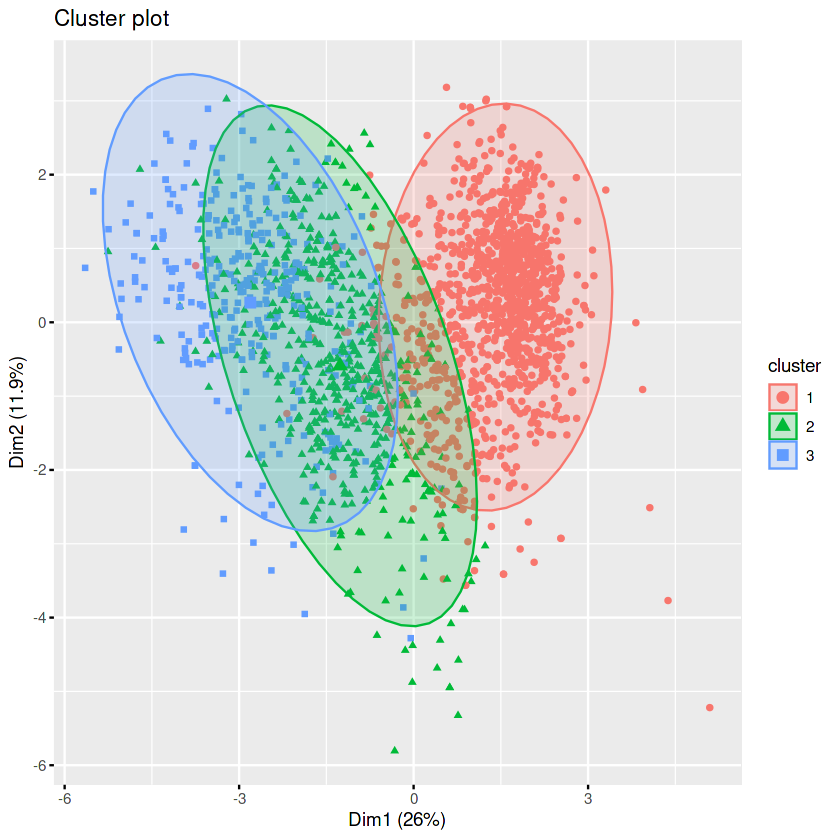

In [33]:
fviz_cluster(km.res, dfc, geom = "point",ellipse.type = "norm",repel = TRUE)

In [34]:
dfc['cluster']=as.factor(km.res$cluster)

In [35]:
head(dfc)

,Marital_StatusMarried,Marital_StatusSingle,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Child,total_spent,accepted,cluster
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,0,1,58,3,8,10,4,7,0,1,64,0,1617,0,3
2,0,1,38,2,1,1,2,5,0,0,67,2,27,0,1
3,0,0,26,1,8,2,10,4,0,0,56,0,776,0,2
4,0,0,26,2,2,0,4,6,0,0,37,1,53,0,1
5,1,0,94,5,5,3,6,5,0,0,40,1,422,0,1
6,0,0,16,2,6,4,10,6,0,0,54,1,716,0,2


In [36]:
attach(dfc)

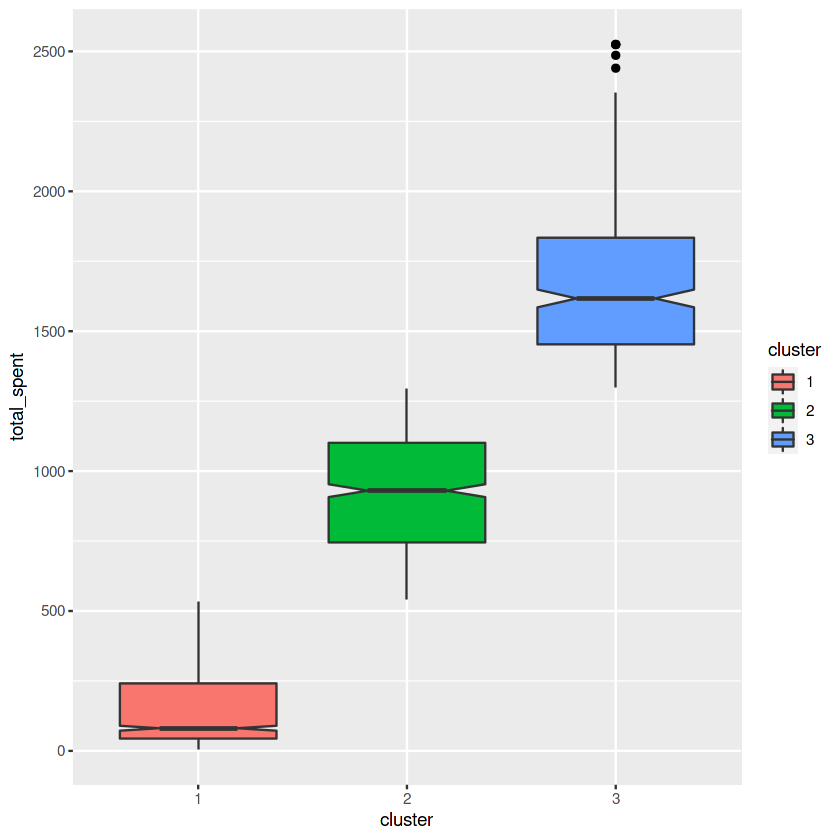

In [37]:
spentplot = ggplot(dfc, aes(x=cluster,y=total_spent,fill=cluster))+geom_boxplot(outlier.colour="black", outlier.shape=16,outlier.size=2, notch=T)
spentplot

<font size="4">we can see a clear seperation in total spent among 3 clusters. This will be helpful to name clusters.</font>

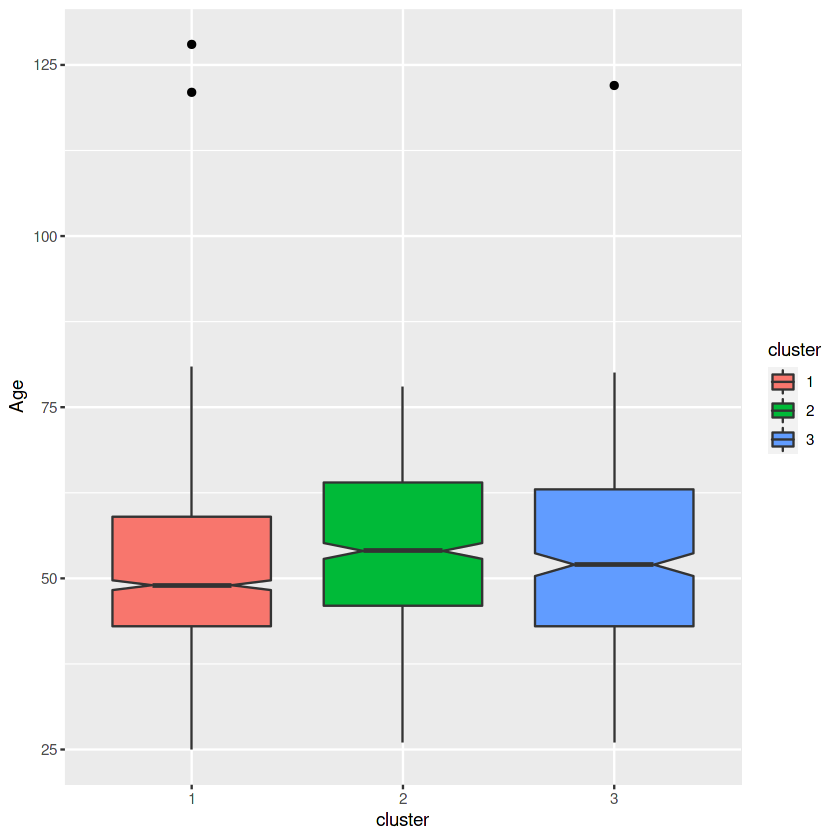

In [38]:
spentplot = ggplot(dfc, aes(x=cluster,y=Age,fill=cluster))+geom_boxplot(outlier.colour="black", outlier.shape=16,outlier.size=2, notch=T)
spentplot

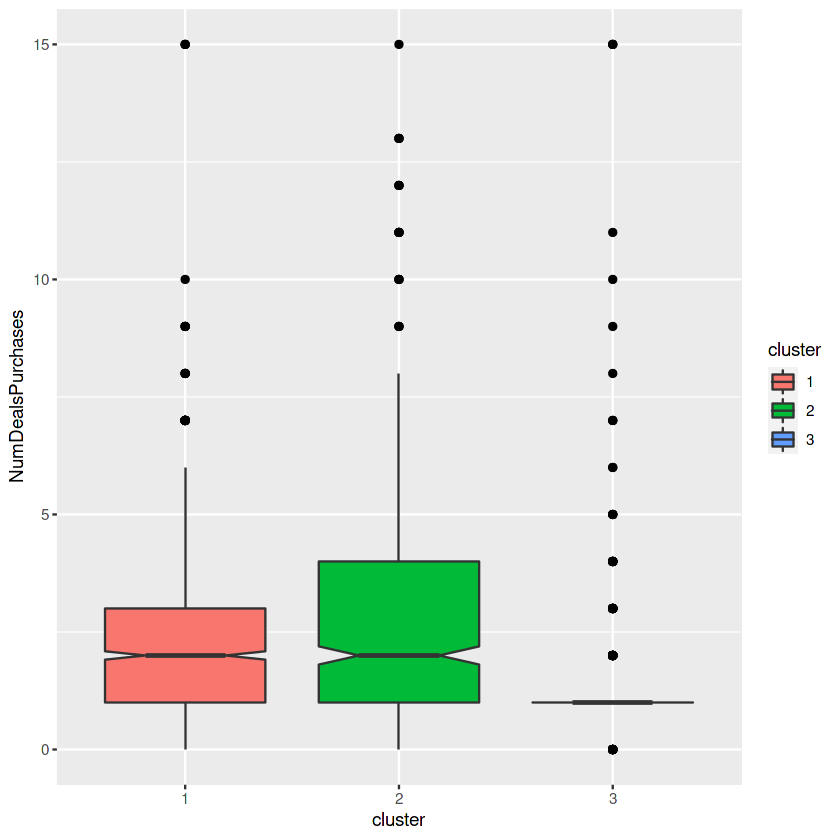

In [39]:
numdealplot = ggplot(dfc, aes(x=cluster,y=NumDealsPurchases,fill=cluster))+geom_boxplot(outlier.colour="black", outlier.shape=16,outlier.size=2, notch=T)
numdealplot

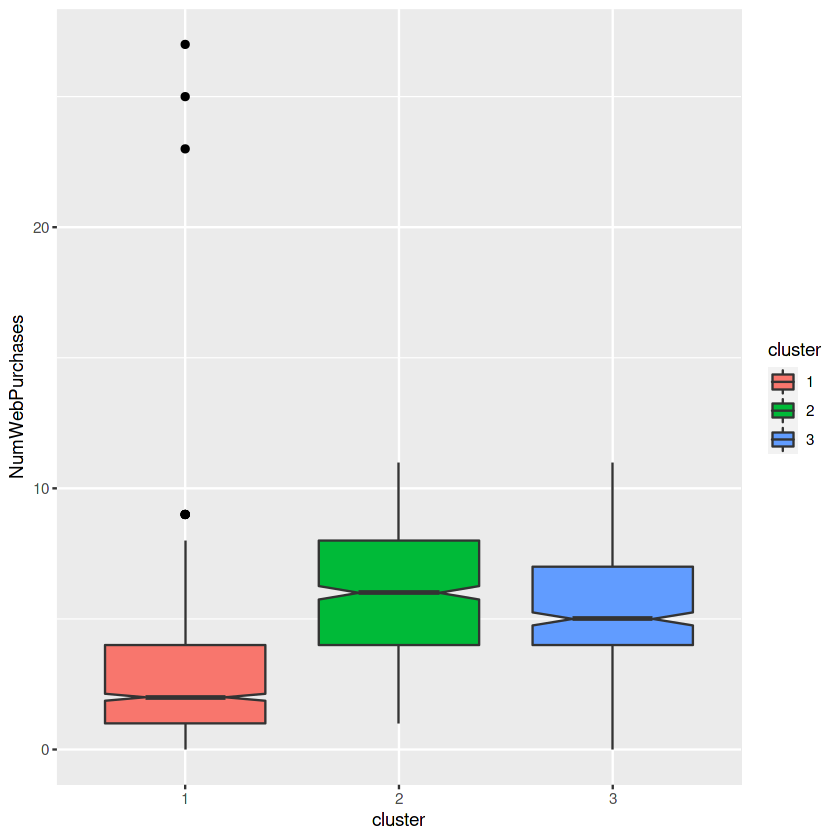

In [40]:
numwebplot = ggplot(dfc, aes(x=cluster,y=NumWebPurchases,fill=cluster))+geom_boxplot(outlier.colour="black", outlier.shape=16,outlier.size=2, notch=T)
numwebplot


notch went outside hinges. Try setting notch=FALSE.



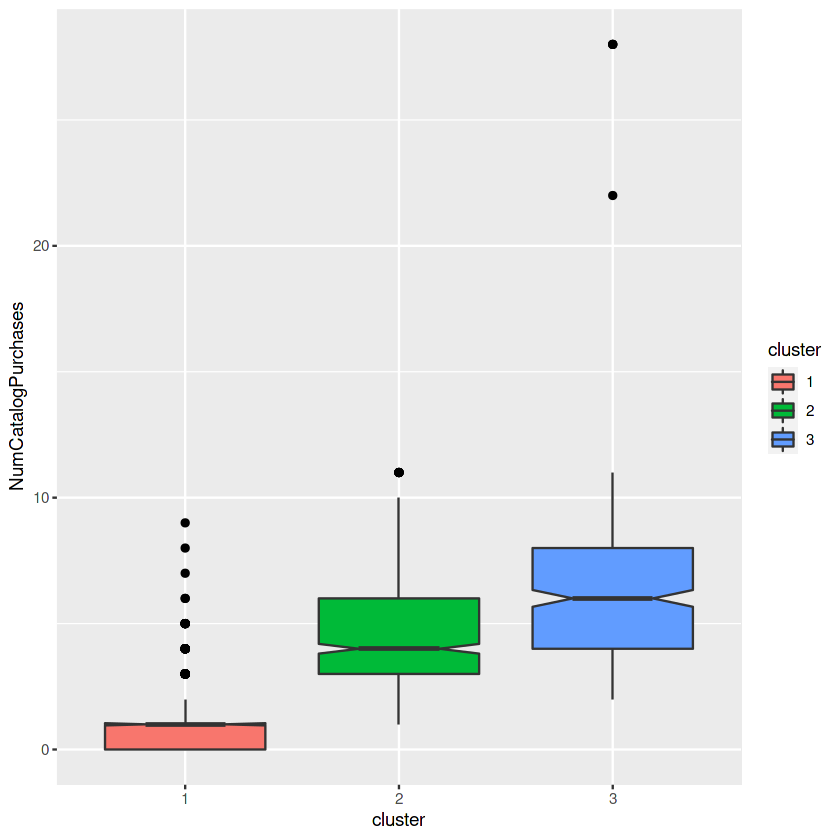

In [41]:
numcatplot = ggplot(dfc, aes(x=cluster,y=NumCatalogPurchases,fill=cluster))+geom_boxplot(outlier.colour="black", outlier.shape=16,outlier.size=2, notch=T)
numcatplot

notch went outside hinges. Try setting notch=FALSE.



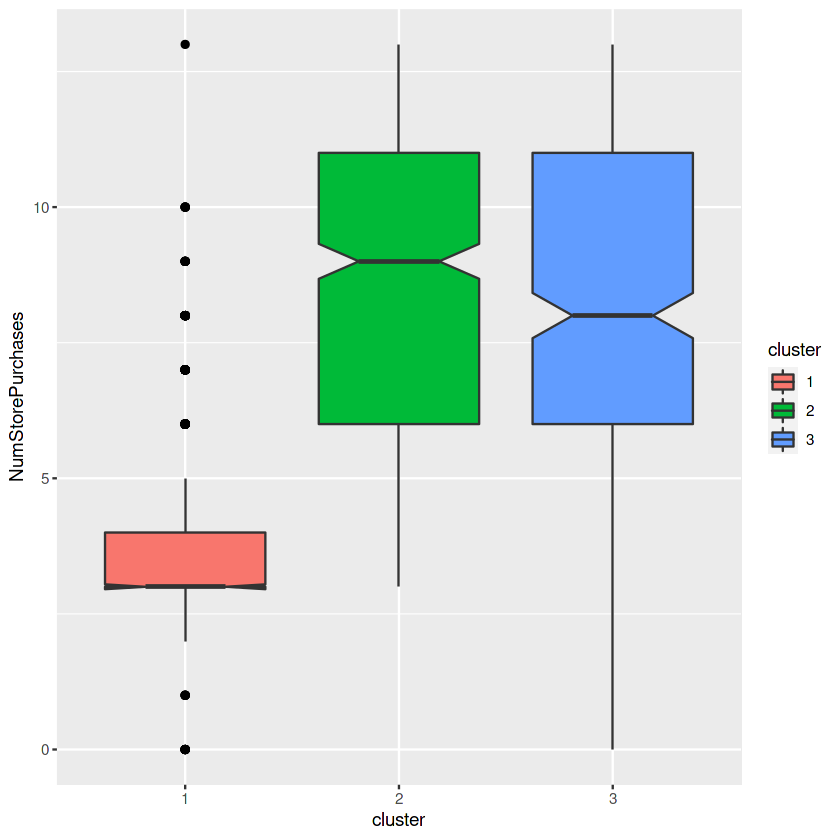

In [42]:
numcatplot = ggplot(dfc, aes(x=cluster,y=NumStorePurchases,fill=cluster))+geom_boxplot(outlier.colour="black", outlier.shape=16,outlier.size=2, notch=T)
numcatplot

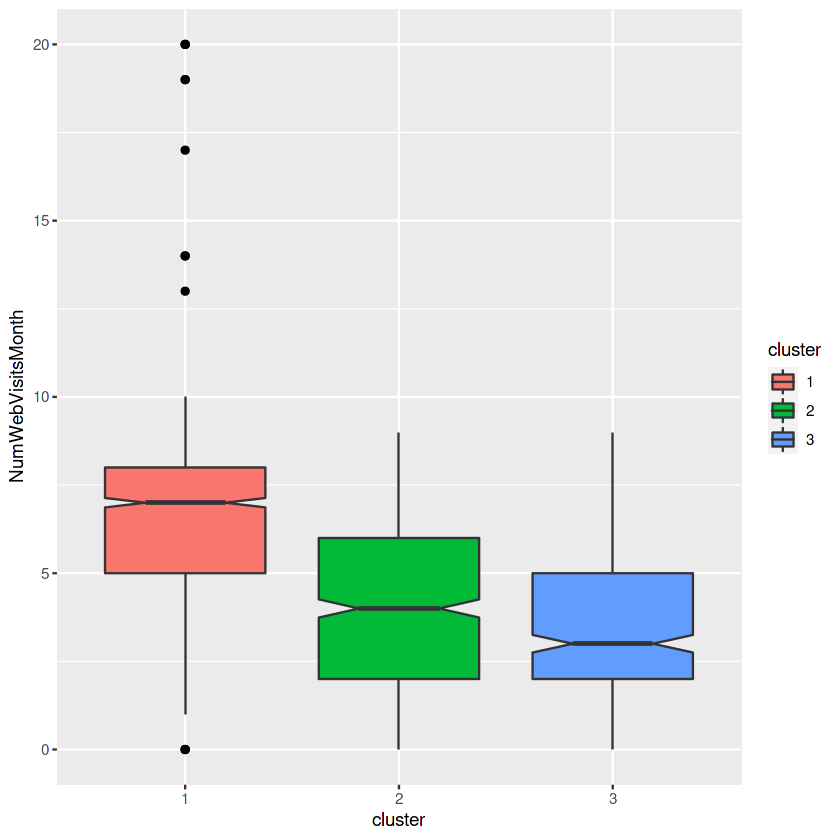

In [43]:
numcatplot = ggplot(dfc, aes(x=cluster,y= NumWebVisitsMonth,fill=cluster))+geom_boxplot(outlier.colour="black", outlier.shape=16,outlier.size=2, notch=T)
numcatplot

## <p style="background-color:#78BAF0;color:black;font-size:23px;text-align:center;border-radius:10px 10px;border-style:solid;border-color:blue;">💎 Conclusion </p>

<font size="4">All the above plotted features have a clear seperation between clusters. According to this analysis we can name these three clusters. cluster 1 has low spenders , cluster 2 has average spenders and cluster 3 has high spenders. </font>

<center><font size="4" style="color:red;">Cluster 1 </font></center>

<center><img src="https://github.com/Isharaneranjana/kaggle_gif/blob/main/THE%20SURFERS1.gif?raw=true" style="width:600px;height:300px;"></center>

<p style="border: 3px solid blue;"><font size="4" color="#0C177B">Lookers or surfers are the customers who are just browsing through your services and probably looking through your competitors as well. They’ve shown some interest, but they are yet to decide on anything.</font></p>

<font size="4" color="blue">💎How to deal with them?</font>

* <font size="4" color="black">Make your website look intriguing and attractive. Write a compelling copy on your web pages and keep the design innovative. Make sure that you drive the onlooker’s attention to the right places by planning the right website engagement strategies.</font>

* <font size="4" color="black"> Remove any obstacles or objections on this initial stage and focus on good customer experience. Even small elements such as intrusive pop-ups, disturbing ads, difficulty navigating, or lack of quick customer support can turn them away.</font>

<center><font size="4" style="color:red;">Cluster 2 </font></center>

<center><img src="https://github.com/Isharaneranjana/kaggle_gif/blob/main/impulsrs.gif?raw=true" style="width:600px;height:300px;"></center>

<p style="border: 3px solid blue;"><font size="4" color="#0C177B">Impulse customers have not really planned on purchasing your products, or any products for that matter. They make purchase decisions at the spur of the moment.</font></p>

<font size="4" color="blue">💎How to deal with them? </font>

* <font size="4" color="black">Provide them with a seamless experience throughout the funnel. Remove even the slightest obstacles and make the whole purchase journey a slippery slide.</font>
* <font size="4" color="black"> Time-sensitive offers work best with these kinds of customers. So offer them time-bound deals that create urgency.</font>
* <font size="4" color="black">Keep your website copy crisp and compelling. Then the user will make the impulse buying decision in your favor.</font>

<center><font size="4" style="color:red;">Cluster 3 </font></center>



<center><img src="https://github.com/Isharaneranjana/kaggle_gif/blob/main/loyal.gif?raw=true" style="width:600px;height:300px;"></center>

 <p style="border: 3px solid blue;"><font size="4" color="#0C177B">Loyal customers are the best kind of customers to have for your business. Repeat customers types keep coming back to you for different products and services and they seem to be impressed with your brand.</font></p>

<font size="4" color="blue"> 💎How to deal with them? </font>

* <font size="4" color="black"> Feature your loyal customers on your case studies or get their testimonials. This will make them feel more valuable, and you get more social proof to add to your website.</font>
* <font size="4" color="black"> Connect with them and understand their success story. Understand what they like about your brand and what made them your loyal customers in the first place. Use their experiences and try to replicate the same for all your other customers.</font>

<font size="4">For more details: </font>
<a href="https://www.revechat.com/blog/types-of-customers/">source </a>

<font size="4" color="black" style="border: 1px solid blue;"><b>Highly appreciate your questions or feedback related to this notebook.If you like this do <span style="color:silver;"> upvote.</span> THANK YOU 😊 </b></font>